# Lab work 7
## Numerical solving of the boundary value problem

We consider a 2-order differential equation $ y'' = f(x,y,y') $ on an interval $[a, b]$ with the boundary conditions  
$$ \alpha_1 y(a) + \beta_1 y'(a) = y_a $$
$$ y(b) = y_b $$

## 1. Shooting method

Let $y'(a)$ be a random number $\xi$. Then we get $y(a)$ from the boundary condition and set a Cauchy problem with these initial conditions:  
$$ \begin{cases}
   y' = z \\
   z' = f(x,y,z)
   \end{cases}
$$
It can be solved with previously learned methods and result $ y(\xi, x) $ can be used to find a value in the point $x=b$.  
If $ y(\xi, b) = y_b $, the task is solved.  
Else there can be 2 variants:  
a) If $ y(\xi, b) > y_b $, then the "shooting angle" $\xi$ must be changed to find a value $\eta$, $ y(\eta, b) < y_b $  
b) else if $ y(\xi, b) < y_b $, then $ y(\eta, b) > y_b $  
Then we make an iterative procedure with using a bisection method to find a correct angle $\zeta$:  
$$ \xi = \zeta_1, \eta = \zeta_2 $$
$$ \zeta_{n+1} = \frac{\zeta_{n-1} + \zeta_n}{2} $$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y_real = lambda x: np.sin(x)
p = lambda x: x
q = lambda x: 1
f = lambda x: x*np.cos(x)
func = lambda x, y, z: f(x) - p(x)*z - q(x)*y

n = 100
a = 0
b = np.pi
eps = 1e-5
alpha = 2
beta = 3
ya = 3
yb = 0
# 2*y(0) + 3*y'(0) = 3
# y(pi) = 0

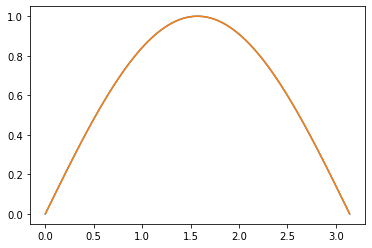

In [3]:
def RungeKutta(x, y0, y_0, func_y, func_y_):
    n = len(x)
    y = []
    y_ = []
    y.append(y0)
    y_.append(y_0)
    for i in range(1, n):
        h = x[i]-x[i-1]
        k1 = func_y(x[i-1], y[i-1], y_[i-1])
        q1 = func_y_(x[i-1], y[i-1], y_[i-1])
        k2 = func_y(x[i-1]+h/2, y[i-1]+h*k1/2, y_[i-1]+h*q1/2)
        q2 = func_y_(x[i-1]+h/2, y[i-1]+h*k1/2, y_[i-1]+h*q1/2)        
        k3 = func_y(x[i-1]+h/2, y[i-1]+h*k2/2, y_[i-1]+h*q2/2)
        q3 = func_y_(x[i-1]+h/2, y[i-1]+h*k2/2, y_[i-1]+h*q2/2)
        k4 = func_y(x[i-1]+h, y[i-1]+h*k3, y_[i-1]+h*q3)
        q4 = func_y_(x[i-1]+h, y[i-1]+h*k3, y_[i-1]+h*q3)
        y.append(y[i-1] + h/6*(k1+2*k2+2*k3+k4))
        y_.append(y_[i-1] + h/6*(q1+2*q2+2*q3+q4))
    return y

def shoot(x, alpha, beta, ya, yb, f, eps):
    xi = ya
    eta = xi
    y0 = (ya - beta*xi)/alpha
    u = lambda x, y, z: z
    y = RungeKutta(x, y0, xi, u, f)
    if(y[-1] - yb < 0):
        while(y[-1] - yb < 0):
            eta = -eta + 1
            y0 = (ya - beta*eta)/alpha
            y = RungeKutta(x, y0, eta, u, f)
    elif(y[-1] - yb > 0):
        while(y[-1] - yb > 0):
            eta = -eta + 1
            y0 = (ya - beta*eta)/alpha
            y = RungeKutta(x, y0, eta, u, f)
    elif(y[-1] - yb == 0):
        return y
    
    zeta = (eta + xi) / 2
    y0 = (ya - beta*zeta)/alpha
    y = RungeKutta(x, y0, zeta, u, f)
    while(abs(y[-1] - yb) > eps):
        if (y[-1] - yb > 0):
            xi = zeta
        else:
            eta = zeta
            
        zeta = (eta + xi) / 2
        y0 = (ya - beta*zeta)/alpha
        y = RungeKutta(x, y0, zeta, u, f)
    return y

x = np.linspace(a, b, n)
y = shoot(x, alpha, beta, ya, yb, func, eps)
plt.plot(x, y_real(x), label='real')
plt.plot(x, y, label='solved')
plt.show()

## 1.1 Accuracy

Order of accuracy =  4.418040513834918


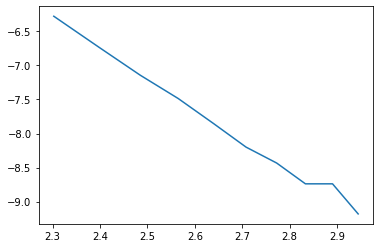

In [4]:
index = np.log([i for i in range(10, 20)])
value = np.log([max(abs(shoot(np.linspace(a, b, i), alpha, beta, ya, yb, func, eps)-np.sin(np.linspace(a, b, i)))) for i in range(10, 20)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 1.2 Linear equation

In a particular case - equation is linear, $ y'' + p(x)y' + q(x)y = f(x) $, it can be solved easier - only 2 shots.  
The solution of it is a general solution of the homogeneous equation plus a particular solution of the inhomogeneous equation: $ y(x) = C \cdot y_{hom}^{gen}(x) + y_{inhom}^{part}(x) $  
Substituting the right point $x = b$, the constant $C$ can be found as 
$ C = \frac{y(b)-y_{inhom}^{part}(b)}{y_{hom}^{gen}(b)} $

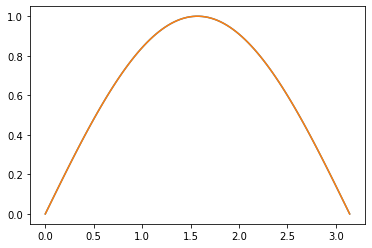

In [72]:
def linear(x, alpha, beta, ya, yb, p, q, f):
    u = lambda x, y, z: z
    hom = lambda x, y, z: -p(x) * z + -q(x) * y
    inhom = lambda x, y, z: -p(x) * z + -q(x) * y + f(x)
    xi = 1
    y0 = (ya - beta*xi)/alpha
    
    y_hom = RungeKutta(x, y0, xi, u, hom) 
    y_inhom = RungeKutta(x, y0, xi, u, inhom) 
    leng = len(y_hom)
    
    y_hom_b = y_hom[-1]
    y_inhom_b = y_inhom[-1]

    const = (yb - y_inhom_b) / y_hom_b
    
    y = [const * y_hom[i] + y_inhom[i] for i in range(leng)]
    return y

x = np.linspace(a, b, n)
y = linear(x, alpha, beta, ya, yb, p, q, f)
plt.plot(x, y_real(x), label='real')
plt.plot(x, y, label='solved')
plt.show() 

## 1.3 Accuracy

Order of accuracy =  4.313173202214544


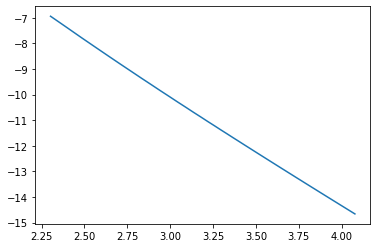

In [20]:
index = np.log([i for i in range(10, 60)])
value = np.log([max(abs(linear(np.linspace(a, b, i), alpha, beta, ya, yb, p, q, f)-np.sin(np.linspace(a, b, i)))) for i in range(10, 60)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 2. Finite difference method

Let's approximate derivatives with finite differences with the second order of accuracy:  
$ y'' = \frac{y_{i+1} - 2 y_i + y_{i-1}}{h^2} $  
$ y'=\frac{y_{i+1} - y_{i-1}}{2h} $  

And values in edges have a special formula:  
$ y'_0 = \frac{-3 y_0 + 4 y_1 - y_2}{2h} $  
$ y'_n = \frac{3 y_n - 4 y_{n-1} + y_{n-2}}{2h} $

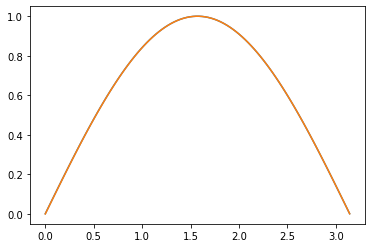

In [67]:
import numpy.linalg as la

def smart_Gauss(A, b):
    n = b.size
    
    # forward elimination
    for j in range(0, n-1):
        for i in range(j+1, n):
            
            #find a max element in j column
            max = abs(A[j,j])
            str = j
            for k in range(j+1, n):
                if abs(A[k,j]) > max:
                    max = abs(A[k,j])
                    str = k
            
            # if max element is 0, matrix is singular
            if max == 0:
                raise la.LinAlgError("Singular matrix")
                
            # else change rows' positions
            else:
                for k in range(n):
                    tmp = A[j,k]
                    A[j,k] = A[str,k]
                    A[str,k] = tmp
            b[j], b[str] = b[str], b[j]
            
            num = A[i,j] / A[j,j]
            A[i,j:n] -= num*A[j,j:n]
            b[i] -= num*b[j]
                
    # back substitution
    res = np.zeros(n)
    # necessary and sufficient conditions of convergence of Gauss method
    for i in range(n-1, -1, -1):
        if A[i,i] != 0:
            res[i] = (b[i] - np.dot(A[i,i+1:n], res[i+1:n])) / A[i,i]
        else:
            raise la.LinAlgError("Singular matrix")
    return res

def finiteDiff(x, alpha, beta, ya, yb, p, q, f):
    n = len(x)
    h = (x[-1] - x[0])/(n-1)
    M = np.zeros((n, n))
    M[0][0] = alpha - 3*beta/2/h
    M[0][1] = 4*beta/2/h
    M[0][2] = -beta/2/h
    M[-1][-1] = 1
    for i in range(1, n-1):
        M[i][i-1] = 1/(h*h) - p(x[i])/(2*h)
        M[i][i] = q(x[i]) - 2/(h*h)
        M[i][i+1] = 1/(h*h) + p(x[i])/(2*h)
    F = np.zeros(n)
    F[0] = ya
    F[-1] = yb
    for i in range(1, n-1):
        F[i] = f(x[i])
    y = smart_Gauss(M, F)
    return y

x = np.linspace(a, b, n)
y = finiteDiff(x, alpha, beta, ya, yb, p, q, f)
plt.plot(x, y_real(x), label='real')
plt.plot(x, y, label='solved')
plt.show() 

## 2.1 Accuracy

Order of accuracy =  2.079319611767246


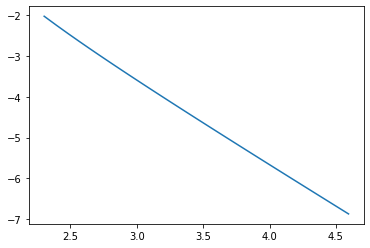

In [68]:
index = np.log([i for i in range(10, n)])
value = np.log([max(abs(finiteDiff(np.linspace(a, b, i), alpha, beta, ya, yb, p, q, f)-np.sin(np.linspace(a, b, i)))) for i in range(10, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 2.2 Finite difference method with a fictional point

Let's make a fictional point $x_{-1}$ to approximate the derivative in bound points:

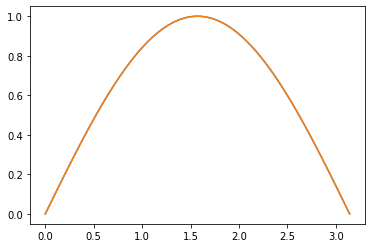

In [69]:
def tridiag(A, b):
    n = b.size
    alpha = np.diagonal(A, offset = -1)
    beta = np.diagonal(A)
    gamma = np.diagonal(A, offset = 1)
    
    P = np.zeros(n)
    P[0] = -gamma[0] / beta[0]
    for i in range(1, n-1):
        P[i] = gamma[i] / (-beta[i] - alpha[i-1]*P[i-1])
    P[n-1] = 0
    
    Q = np.zeros(n)
    Q[0] = b[0] / beta[0]
    for i in range(1, n):
        Q[i] = (alpha[i-1]*Q[i-1] - b[i]) / (-beta[i] - alpha[i-1]*P[i-1])
        
    x = np.zeros(n)
    x[n-1] = Q[n-1]
    for i in range(n-2, -1, -1):
        x[i] = P[i]*x[i+1] + Q[i]
    
    return x


def fictDot(x, alpha, beta, ya, yb, p, q, f):
    n = len(x)
    h = (x[-1] - x[0])/(n-1)
    M = np.zeros((n,n))
    M[0][0] = q(x[0]) - 2/h/h + 2*alpha/beta/h - alpha*p(x[0])/beta
    M[0][1] = 2/h/h
    M[-1][-1] = 1
    for i in range(1, n-1):
        M[i][i-1] = 1/(h*h) - p(x[i])/(2*h)
        M[i][i] = q(x[i]) - 2/(h*h)
        M[i][i+1] = 1/(h*h) + p(x[i])/(2*h)
    F = np.zeros(n)
    F[0] = f(x[0]) + 2*ya/beta/h - p(x[0])*ya/beta
    F[-1] = yb  
    for i in range(1, n-1):
        F[i] = f(x[i])
    result = tridiag(M, F)
    return result

x = np.linspace(a, b, n)
y = fictDot(x, alpha, beta, ya, yb, p, q, f)
plt.plot(x, y_real(x), label='real')
plt.plot(x, y, label='solved')
plt.show() 

## 2.3 Accuracy

Order of accuracy =  2.069587591329805


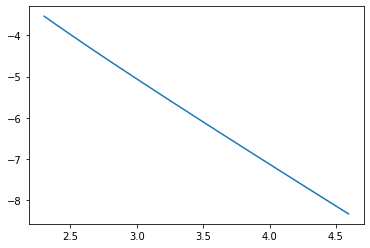

In [70]:
index = np.log([i for i in range(10, n)])
value = np.log([max(abs(fictDot(np.linspace(a, b, i), alpha, beta, ya, yb, p, q, f)-np.sin(np.linspace(a, b, i)))) for i in range(10, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()